In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import folium


/anaconda2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [3]:
What_grade = int(raw_input('What grade would you like to see?'))

diffMaxboulder = str(What_grade*100+50+20000)
diffMinboulder = str(What_grade*100-50+20000)

URL = 'https://www.mountainproject.com/route-finder?diffMaxaid=75260&diffMaxboulder=20750&diffMaxice=38500&diffMaxmixed=60000&diffMaxrock=5500&diffMinaid=70000&diffMinboulder=20650&diffMinice=30000&diffMinmixed=50000&diffMinrock=1800&is_sport_climb=1&is_top_rope=1&is_trad_climb=1&pitches=0&selectedIds=0&sort1=popularity%20desc&sort2=area&stars=0&type=boulder&viewAll=0'

baseURL = 'https://www.mountainproject.com/route-finder'


parameters = {
    'diffMaxaid':'75260',
    'diffMaxboulder':diffMaxboulder,
    'diffMaxice':'38500',
    'diffMaxmixed':'60000',
    'diffMaxrock':'5500',
    'diffMinaid':'70000',
    'diffMinboulder':diffMinboulder,
    'diffMinice':'30000',
    'diffMinmixed':'50000',
    'diffMinrock':'1800',
    'is_sport_climb':'1',
    'is_top_rope':'1',
    'is_trad_climb':'1',
    'pitches':'0',
    'selectedIds':'0',
    'sort1':'popularity desc',
    'sort2':'area',
    'stars':'0',
    'type':'boulder',
    'viewAll':'0'
}
page = requests.get(baseURL,params=parameters)






soup = BeautifulSoup(page.text, 'html.parser')

thing = soup.find_all(class_='float-md-left')

csv_URL = (thing[0].find_all('a',rel=True)[0]['href'])




climbs = pd.read_csv(csv_URL)


coords_only = (climbs[['Area Latitude','Area Longitude']])

What grade would you like to see?5


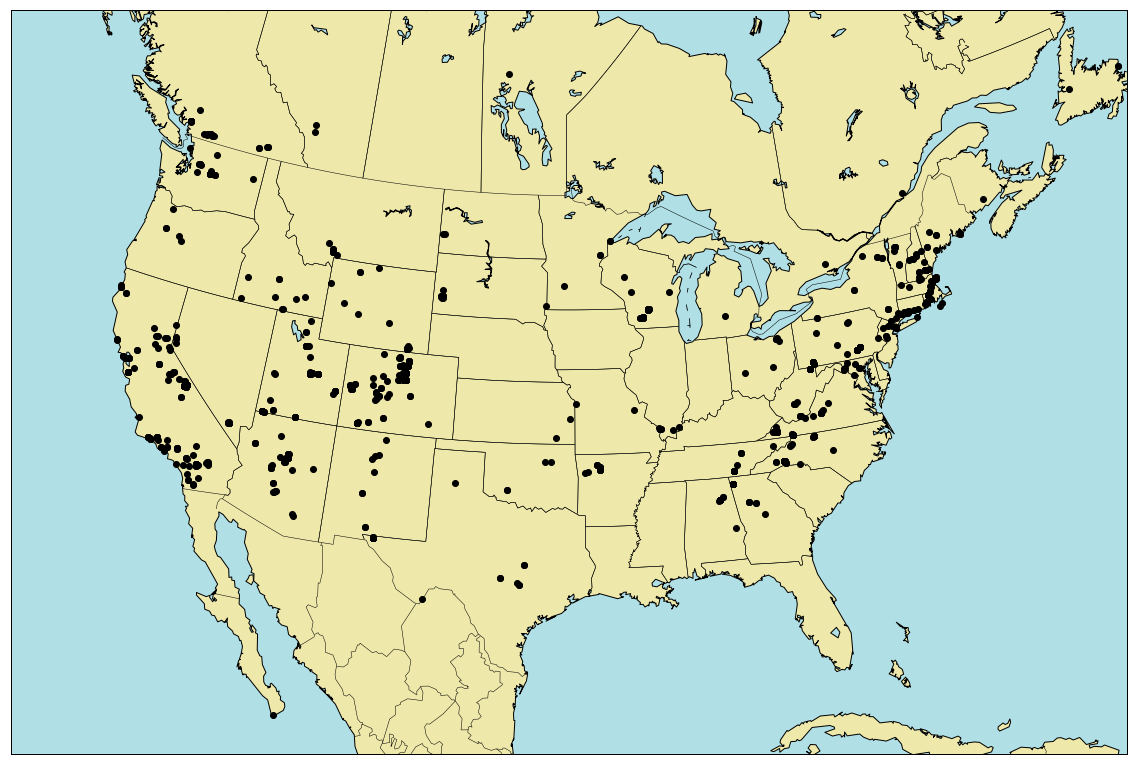

In [83]:
lat = coords_only['Area Latitude'].values
lon = coords_only['Area Longitude'].values



fig = plt.figure(figsize=(20, 20), edgecolor='w')
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',lat_0=40,lon_0=-95.)
def draw_map(m, scale=0.2):
    m.drawcoastlines()
    m.fillcontinents(color='palegoldenrod',lake_color='powderblue')
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='powderblue')
   

draw_map(m)
m.plot(lon, lat,'ok', latlon=True)

In [96]:
where = []

lat = coords_only['Area Latitude'].values
lon = coords_only['Area Longitude'].values



fig = plt.figure(figsize=(20, 20), edgecolor='w')
m = Basemap(width=6000000,height=4000000,
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',lat_0=40,lon_0=-95.)
def draw_map(m, scale=0.2):
    m.drawcoastlines()
    m.fillcontinents(color='palegoldenrod',lake_color='powderblue')
    m.drawcountries()
    m.drawstates()
    m.drawmapboundary(fill_color='powderblue')
   

draw_map(m)
m.plot(lon, lat,'ok', latlon=True)


                     Route  \
431  Scareball Masterpiece   
629  Highwater Hippy Pants   
653  Without the Within      
657  Tetanus                 
701  Captured in Jamaica     
716  Mr. T                   
727  O'Malley                
777  The Burgler             
778  Fire Breather           
784  7 Ball                  
793  Brian's Thin            
813  Too Hard Too High       
816  Into the Light          
817  Monty Python's Direct   

                                                                                                                                                                            Location  \
431  Lost World > Archangel Bouldering > Archangel Valley Bouldering - Diamond, Fairangel, Monolith, Roadside, Indianhead > Hatcher Pass > Anchorage & South Central Alaska > Alaska   
629  Wave Boulder > Rock Creek Bouldering > Fairbanks and Vicinity > Alaska                                                                                                          

In [102]:
print(soup.find_all(class_= 'modal-fade'))

[]
